In [1]:
import inspect
import librosa
print(inspect.getfile(librosa)) # random 모듈의 위치

C:\Users\CS\AppData\Local\Programs\Python\Python39\lib\site-packages\librosa\__init__.py


In [2]:
import librosa
from matplotlib import pyplot as plt
import sounddevice as sd

In [3]:
example_file_path = librosa.ex('trumpet')
print(f'예제 파일은 다음 위치에 있습니다.\n파일 경로: {example_file_path}')

예제 파일은 다음 위치에 있습니다.
파일 경로: C:\Users\CS\AppData\Local\librosa\librosa\Cache\sorohanro_-_solo-trumpet-06.ogg


In [4]:
y, sr = librosa.load(example_file_path)
# y는 소리의 Amplitude 벡터, sr은 Sampling Rate를 의미

In [5]:
sd.play(y)

### [벡터 값 20개 출력]

In [6]:
print(f' {y}\nsampling_rate : {sr}')

 [-1.4068224e-03 -4.4607223e-04 -4.1098078e-04 ...  7.9623060e-06
 -3.0417003e-05  1.2765067e-05]
sampling_rate : 22050


### [벡터 길이 출력]

In [7]:
print(f'y는 {len(y)} 길이의 벡터')

y는 117601 길이의 벡터


### [벡터 값 20개 출력]

In [8]:
print(f'y의 앞 20개 값은?\n{y[:20]}')

y의 앞 20개 값은?
[-1.4068224e-03 -4.4607223e-04 -4.1098078e-04  9.9920901e-05
  4.3150427e-05 -1.7485349e-04 -3.6783377e-04  1.4553138e-04
  5.0557830e-04  1.4929948e-03  1.8555219e-03  9.2913158e-04
 -4.0743878e-04 -2.0390339e-03 -1.2686776e-03 -5.3472776e-04
  8.9941407e-04  9.7593543e-04  1.0019976e-03 -1.2960718e-03]


y의 길이를 sampling rate로 나누면 y가 몇 초 데이터인지 알 수 있다.

### [0.1초까지 시각화]

In [9]:
print(f'y는 {len(y) / sr} 초의 신호 벡터!')

y는 5.333378684807256 초의 신호 벡터!


### [예시 데이터 시각화]

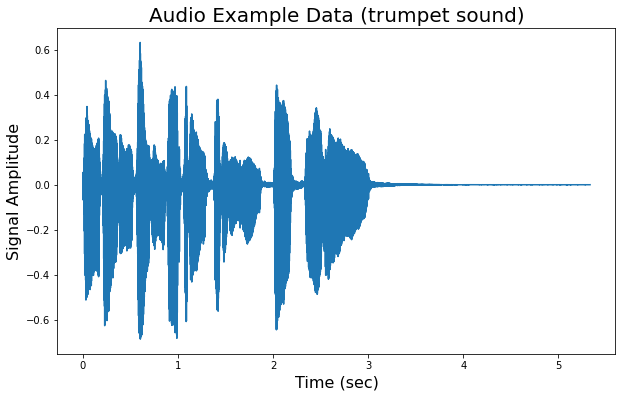

In [10]:
# y 벡터의 각 값에 해당하는 초 값이 들어있는 리스트 만들기
x = [i / sr for i in range(len(y))]

plt.figure(figsize=(10, 6))
plt.plot(x, y)
# 시간과 신호 진포 값을 시각화
plt.title('Audio Example Data (trumpet sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.show()

### [1초까지 시각화]

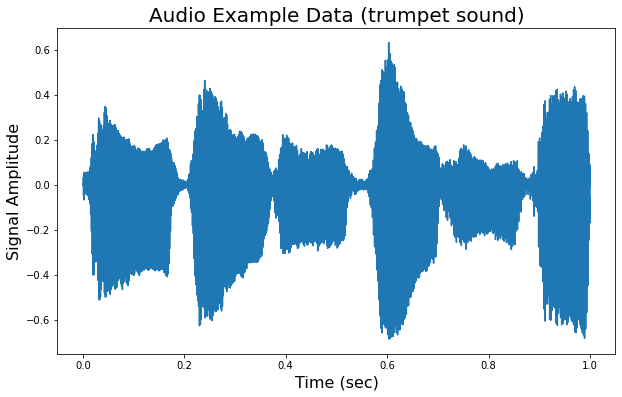

In [11]:
plt.figure(figsize=(10,6))
plt.plot(x[:sr], y[:sr])
plt.title('Audio Example Data (trumpet sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.show()

### [0.1초까지 시각화]

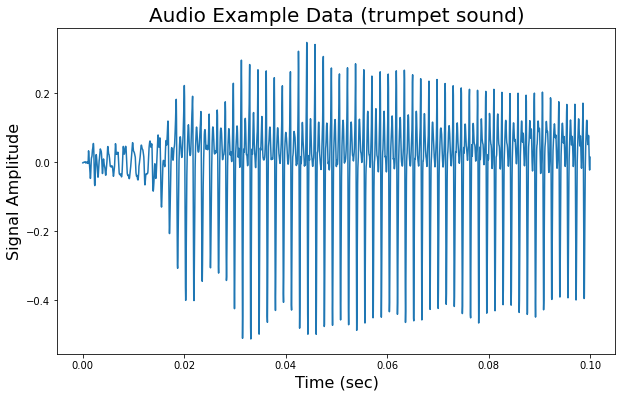

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(x[:sr//10], y[:sr//10])
plt.title('Audio Example Data (trumpet sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.show()

### [0.01초까지 시각화]

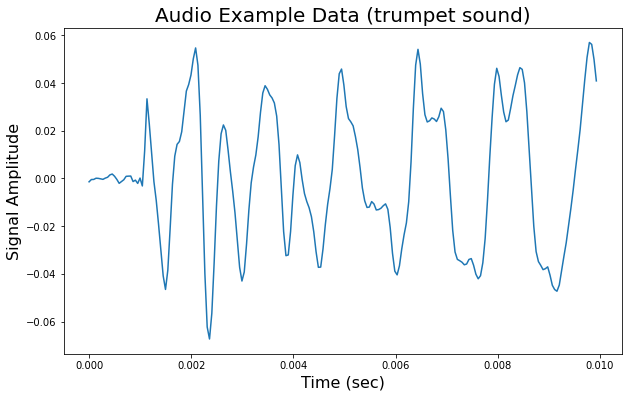

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(x[:sr//100], y[:sr//100])
plt.title('Audio Example Data (trumpet sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.show()

## 비명 데이터 & 비 비명 데이터 수집 방식
- Youtube
    + Screaming이 포함된 검색어 키워드 중심으로 크롤링 및 음성 파일로 변환
    + 비명 소리만 있는 것이 아닌 다양한 소리도 섞여 있으므로 같이 사용
- 구글 검색
    + '효과음'키워드 중심으로 검색해 다양한 블로그와 카페에서 무료로 제공된 게이터 수집
    + 비명과 헷갈릴 수 있는 소방차 사이렌, 환호 소리, 트림 소리등 추가 수집
- 직접 녹음
    + 조용한 공간에서 직접 녹음하여 수집

*데이터 레이블링 - Audacity 프로그램 사용*

## 데이터 불러오기

### [Library Import]

In [14]:
import pandas as pd
import librosa
import numpy as np

### [파일 경로 설정]

In [27]:
example_audio_path = './example/꿩+klankbeeld.wav'
example_label_path = './example/꿩+klankbeeld.txt'

### [소리 데이터 로드]

In [28]:
example_audio, example_sr = librosa.load(example_audio_path)
print(
    f'audio 벡터 길이 : {len(example_audio)}\
    \naudio 파일 길이 : {len(example_audio) / sr} 초'
)

audio 벡터 길이 : 85604    
audio 파일 길이 : 3.882267573696145 초


### [레이블 데이터 로드]

In [29]:
example_label = pd.read_csv(
    example_label_path, sep = '\t', names=['start(s)', 'end(s)', 'label']
)
print(
    f'label :\
    \n{example_label}'
)

label :    
   start(s)    end(s)  label
0   0.00000  1.191226      0
1   1.33714  3.210092      0


## Frame Processing & 짝 맞추기

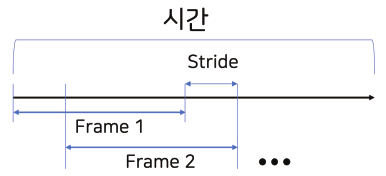

데이터를 동일한 구간, 즉 Frame으로 쪼갬

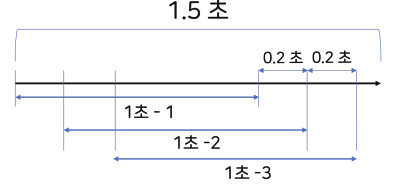

1초를 Frame으로, o.2초씩 Stride

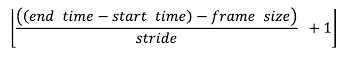

위의 식으로 몇개의 Frame이 나오는지 알 수 있음

### [Frame Size & Stride 선언 및 1초 미만 레이블 제거]

In [30]:
frame_size = 1
stride = 0.2

idx = example_label['end(s)'] - example_label['start(s)'] >= frame_size
example_label = example_label[idx]
# Frame Size(1초) 이상 레이블 구간만 선택한 다는 의미

### [레이블별 Frame 개수 & 총 Frame 개수 출력]

In [31]:
each_n_frames = (
    np.floor(
        (
            (
                (
                    example_label['end(s)'] - example_label['start(s)']
                ) - frame_size
            ) / stride
        ) + 1
    )
).astype(int).values

total_n_frames = sum(each_n_frames)

print(f'각각의 구간마다 프레임 개수 : {each_n_frames}')
print(f'총 구간의 프레임 개수 : {total_n_frames}')

각각의 구간마다 프레임 개수 : [1 5]
총 구간의 프레임 개수 : 6


### [Frame 벡터 & Target 벡터를 담을 빈 벡터 생성]

In [44]:
frame_vectors = np.zeros((int(total_n_frames), frame_size * sr))
target_vectors = np.zeros((int(total_n_frames), 1))
print(
    f'frame_vectors의 shape : {frame_vectors.shape}\
    \ntarget_vectors의 shape : {target_vectors.shape}'
)
for i in range(len(frame_vedtors)):
    print(f'{i}-th frame vector[:5] : {frame_vectors[i][:5]}')

frame_vectors의 shape : (6, 22050)    
target_vectors의 shape : (6, 1)
0-th frame vector[:5] : [0. 0. 0. 0. 0.]
1-th frame vector[:5] : [0. 0. 0. 0. 0.]
2-th frame vector[:5] : [0. 0. 0. 0. 0.]
3-th frame vector[:5] : [0. 0. 0. 0. 0.]
4-th frame vector[:5] : [0. 0. 0. 0. 0.]
5-th frame vector[:5] : [0. 0. 0. 0. 0.]


In [45]:
current_idx = 0

for i, (start, end, y) in example_label.iterrows():
    for j in range(each_n_frames[i]):
        start_idx = int((start + j * stride) * example_sr)
        end_idx = start_idx + frame_size * example_sr
        frame_vectors[current_idx] = example_audio[start_idx:end_idx]
        target_vectors[current_idx] = y
        current_idx += 1
print(
    f'frame_vectors의 shape : {frame_vectors.shape}\
    \ntarget_vectors의 shape : {target_vectors.shape}'
)
for i in range(len(frame_vectors)):
    print(f'{i}-th frame vector[:5] : {frame_vectors[i][:5]}')
print(f'target_vectors : {target_vectors}')

frame_vectors의 shape : (6, 22050)    
target_vectors의 shape : (6, 1)
0-th frame vector[:5] : [-0.00265772  0.00103548  0.00018767 -0.00690498 -0.00465354]
1-th frame vector[:5] : [0.00462255 0.00474213 0.00503599 0.00415416 0.00215303]
2-th frame vector[:5] : [0.01052688 0.01409292 0.0158177  0.01223616 0.00895123]
3-th frame vector[:5] : [-0.00730914 -0.01086354 -0.0084091  -0.01000284 -0.01859629]
4-th frame vector[:5] : [0.05644109 0.06171763 0.05151632 0.03100646 0.016623  ]
5-th frame vector[:5] : [-0.001992   -0.00298869  0.00015296  0.00136695 -0.00181217]
target_vectors : [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


## Feature Extraction

In [46]:
y = frame_vectors[1]

### [새 울음 소리 재생]

In [49]:
sd.play(y)

### [예시 데이터 벡터 살펴보기]

In [48]:
print(
    f'벡터의 shape : {y.shape}\
    \n벡터의 대략적인 모습은... :\n {y}'
)

벡터의 shape : (22050,)    
벡터의 대략적인 모습은... :
 [ 0.00462255  0.00474213  0.00503599 ... -0.00755864 -0.00101585
  0.00437011]


### [새 울음 소리 1초 데이터 시각화]

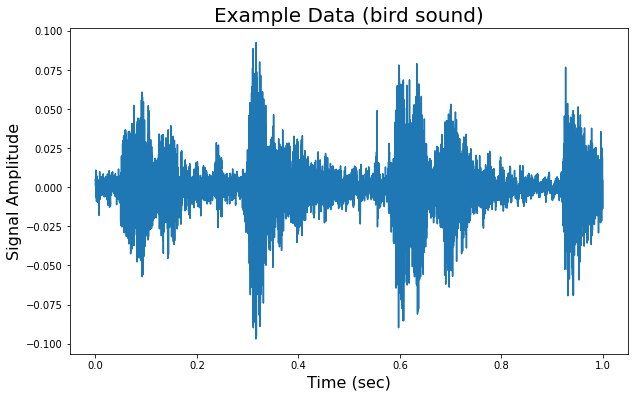

In [50]:
x = [t / sr for t in range(len(y))]

plt.figure(figsize = (10, 6))
plt.plot(x, y)
plt.title('Example Data (bird sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.show()

### [Mel Spectrogram 추출 및 시각화]

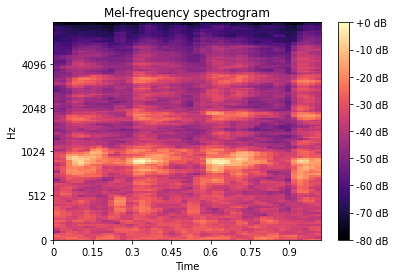

In [52]:
from librosa.display import specshow
# y는 소리의 Amplitude 벡터, sr은 Sampling Rate를 의미
S = librosa.feature.melspectrogram(y=y, sr=sr)
fig, ax = plt.subplots()
# 파워 단위에서 데시벨 단위로 변환
S_dB = librosa.power_to_db(S, ref=np.max)
img = specshow(
    S_dB, x_axis='time', y_axis='mel',
    sr = sr, fmax=8000, ax = ax
)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
plt.show()